# Code for post about ChatGPT v Google

Emilio Lehoucq

2/15/23

## Loading libraries and helper function

In [1]:
import shutil
import pandas as pd
from matplotlib import pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

The three following cells 1) clone [this GitHub repository](https://github.com/emiliolehoucq/linkedin_posts) into the [current working directory](https://data-flair.training/blogs/python-directory/#:~:text=To%20find%20out%20which%20directory,use%20the%20getcwd()%20method.&text=Cwd%20is%20for%20current%20working,use%20the%20method%20getcwdb().), 2) load a helper function into the notebook, and 3) remove the directory with the clone of the GitHub repository.

The helper function can be saved to the notebook.

The cell that loads the helper function into the current notebook doesn't run the code automatically. After loading the helper function, you need to run the cell.

To read more about how to clone a GitHub repository and how to remove a directory, see:
- https://stackoverflow.com/questions/52741983/import-a-github-into-jupyter-notebook-directly
- https://stackoverflow.com/questions/43756284/how-to-remove-a-directory-including-all-its-files-in-python

In [2]:
%%bash
git clone https://github.com/emiliolehoucq/linkedin_posts

Cloning into 'linkedin_posts'...


In [3]:
# %load linkedin_posts/code/helper_functions/my_parser.py
# I've only used this function with limited data and haven't tested it --Emilio Lehoucq 2/15/23

from nltk import word_tokenize
import re

def my_parser(text, words_to_remove, remove_http = False):
    """
    Function to parse text.
    
    Input:
        text (string). Text to be parsed.
        words_to_remove (list). List of words to be removed (such as stopwords).
        remove_http (Boolean). If True, removes hyperlinks from text before tokenizing it. Defaults to False.
    Output:
        List of parsed words.

    Dependencies:
        from nltk import word_tokenize
        import re (necessary if remove_http = True)
    
    Code inspired from:
        - https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/40823105#40823105
        - https://deepnote.com/@code-along-tutorials/Natural-Language-Processing-in-Python-Exploring-Word-Frequencies-with-NLTK-47ec085a-7a46-4f5d-89a1-e08be7d164c5
    """
    # if remove_http = True, remove hyperlinks:
    if remove_http: text = re.sub(r'http\S+', '', text)

    # Tokenize:
    words = word_tokenize(text)

    # Remove punctuation, use lower case, and remove words_to_remove:
    result = []
    for word in words:
        if word.isalpha():
            if word.lower() not in words_to_remove:
                result.append(word.lower())

    # Return list of parsed words:           
    return result

In [4]:
shutil.rmtree("linkedin_posts")

## Defining paths

In [5]:
data_path = '../../data/'
plots_path = '../../plots/drafts/'
plot_wordcloud = 'chat_gpt_wordcloud.png'
plot_word_freq = 'chat_gpt_word_freq.png'

## Reading data

In [6]:
data = pd.read_csv(data_path + 'data_chat_gpt.csv')

## Cleaning data

In [7]:
words_to_remove = stopwords.words("english")
words_to_remove.extend(['chatgpt', 'chat', 'gpt', 'ai', 'openai', 'chatbot', 'amp'])
 
data['tweet_parsed'] = data.apply(lambda row: my_parser(row['tweet'], words_to_remove, remove_http = True), axis = 1) # https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

tweets = []
for words in data['tweet_parsed']:
    for word in words:
        tweets.append(word)

## Exploring data

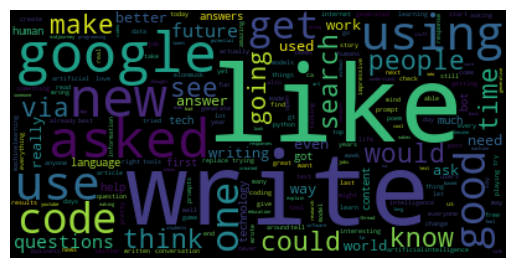

In [8]:
fd = FreqDist(tweets)

wordcloud = WordCloud().generate_from_frequencies(frequencies = FreqDist(tweets))

plt.imshow(wordcloud, interpolation = "bilinear") # https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py
plt.axis("off")

plt.savefig(plots_path + plot_wordcloud, bbox_inches = 'tight', dpi = 200)

In [9]:
for i, row in data.sort_values('retweet_count', ascending = False).head(100).iterrows():
    print(f"Likes: {row['like_count']:,}, quotes: {row['quote_count']:,}, replies: {row['reply_count']:,}, retweets: {row['retweet_count']:,}")
    print(f"Tweet: {row['tweet']}\n")

Likes: 11,461, quotes: 731, replies: 5,184, retweets: 10,593
Tweet: We asked Open AI's #ChatGPT what it thought of the unique architecture that #Quai has implemented to solve the blockchain trilemma...💻\n\nWhat do you think of its response?👀\n\n#QuaiNetwork #OpenAI #Crypto #EVM #Layer1 #Blockchain #BTC #ETH #ArtBasel #ETHDenver #WBSBangkok https://t.co/qpVhCIRsV9

Likes: 49,891, quotes: 1,053, replies: 1,056, retweets: 10,564
Tweet: ChatGPT has crossed 1M+ users in just 5 days. \n\nTo compare, it took Netflix 41 months, FB - 10 months, and Instagram - 2.5 months. \n\nBut many haven’t yet realized its full potential.\n\nHere are the 10 mindblowing things you can do using it right now:

Likes: 31,825, quotes: 239, replies: 498, retweets: 7,228
Tweet: AI tools that didn't exist one year ago:\n\nChatGPT\nWhisper\nGPT-3\nCodex\nGitHub Copilot\nInstructGPT\nText-to-product\nAI slides\nDALLE + API\nMidjourney\nStable Diffusion\nRunway videos\nEmail AI\nAI chrome extensions\nReplit Ghostwriter

In [10]:
for i, row in data.sort_values('retweet_count', ascending = False).head(100).iterrows():
    if 'google' in row['tweet_parsed']:
        print(f"Likes: {row['like_count']:,}, quotes: {row['quote_count']:,}, replies: {row['reply_count']:,}, retweets: {row['retweet_count']:,}")
        print(f"Tweet: {row['tweet']}\n")

Likes: 26,835, quotes: 1,142, replies: 898, retweets: 4,108
Tweet: Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB

Likes: 17,794, quotes: 252, replies: 551, retweets: 1,760
Tweet: ChatGPT is the new Google.

Likes: 6,087, quotes: 81, replies: 86, retweets: 1,166
Tweet: Looks like the first open source equivalent of ChatGPT has arrived: https://t.co/4vQ83pcX2H\n\nI.e., an implementation of RLHF (Reinforcement Learning with Human Feedback) on top of Google’s 540 billion parameter PaLM architecture

Likes: 13,114, quotes: 175, replies: 166, retweets: 1,122
Tweet: ChatGPT saved me an hour of spreadsheet work today. It wrote a complex sorting script beyond my ability, explained how it works, and helped me deploy it.\n\nThe party tricks have been fun, but this was a whoa moment for me similar to the first time I used Google Search.

Likes: 12,975, quotes: 69, replies: 81, retweets: 1,035
Tweet: (guy who was all in crypto/web3 last year) \n\nI’ve b

## Plot for post

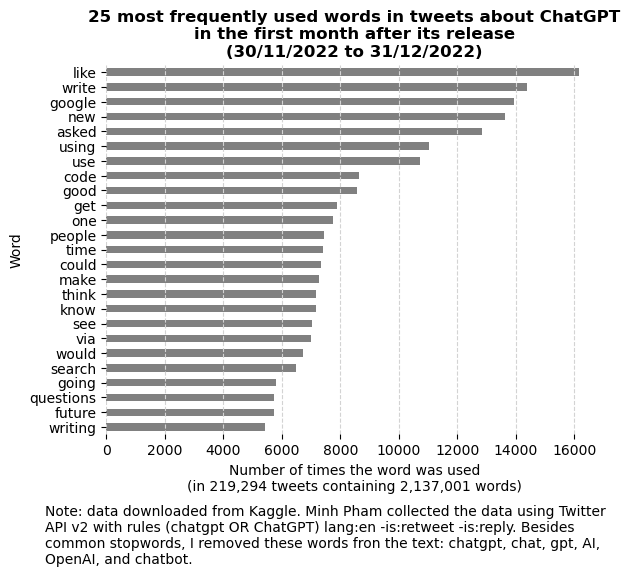

In [11]:
fd_df = pd.DataFrame(fd.items(), columns=['word', 'frequency'])

ax = fd_df.sort_values('frequency', ascending = False).head(25).sort_values('frequency').plot.barh(x = 'word', legend = False, color = 'gray')
ax.xaxis.grid(linestyle = '--', color = 'lightgrey')
plt.title("25 most frequently used words in tweets about ChatGPT\nin the first month after its release\n(30/11/2022 to 31/12/2022)", fontweight = "bold")
ax.set_xlabel(f"Number of times the word was used\n(in {data.shape[0]:,} tweets containing {len(tweets):,} words)")
ax.set_ylabel("Word")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.figtext(0.03, -0.16, 'Note: data downloaded from Kaggle. Minh Pham collected the data using Twitter\nAPI v2 with rules (chatgpt OR ChatGPT) lang:en -is:retweet -is:reply. Besides\ncommon stopwords, I removed these words fron the text: chatgpt, chat, gpt, AI,\nOpenAI, and chatbot.')

plt.savefig(plots_path + plot_word_freq, bbox_inches = 'tight', dpi = 120)